# Partie 1 : Dynamic Time Warping (DTW)

Ce _notebook_ est tiré d'un tutoriel ["Machine Learning et séries temporelles en Python"](https://tslearn-team.github.io/tutoriel-cap2023/) organisé dans le cadre de CAp 2023.
Ce tutoriel est animé par Yann Cabanes, Johann Faouzi et Romain Tavenard.
Ce _notebook_ utilise la librairie `tslearn` dont les docs sont consultables en ligne à l'adresse <https://tslearn.readthedocs.io/>.

## Pour commencer, les imports

Il n'est pas demandé _a priori_ d'opérer de changements au code ci-dessous.

Exécutez la cellule suivante pour installer le paquet `tslearn` :

In [1]:
!pip install tslearn

Vérifiez que l'installation s'est bien passée en exécutant les imports suivants :

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tslearn.metrics import dtw_path
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter
from tslearn.clustering import TimeSeriesKMeans

## Mesure de similarité entre séries temporelles

Utilisons le code suivant pour définir deux séries temporelles `x0` et `x1` :

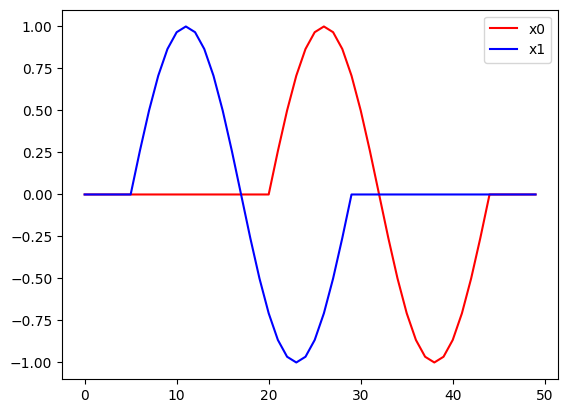

In [3]:
size = 50
x0 = np.zeros((size, ))
x0[20:20+size//2] = np.sin(np.linspace(0, 2 * np.pi, size // 2))

x1 = np.zeros((size, ))
x1[5:5+size//2] = np.sin(np.linspace(0, 2 * np.pi, size // 2))

plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1, 'b-', label='x1')  # blue
plt.legend()
plt.show()

**Question.** Calculez la similarité DTW entre `x0` et `x1` à l'aide de la fonction [`dtw_path`](https://tslearn.readthedocs.io/en/stable/gen_modules/metrics/tslearn.metrics.dtw_path.html) de `tslearn`.

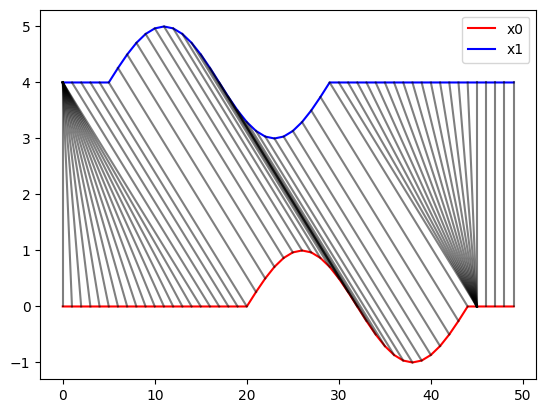

DTW(x0,x1)=0.0


In [4]:
# TODO ici : appel de la fonction dtw_path
path, dist = dtw_path(x0, x1)

plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1 + 4, 'b-', label='x1')  # blue
for i, j in path:
    plt.plot([i, j], [x0[i], x1[j] + 4], "k-", alpha=.5)
plt.legend()
plt.show()

print(f"DTW(x0,x1)={dist}")

## Barycentres de séries temporelles

Vous allez maintenant illustrer le fonctionnement de plusieurs mesures de similarité en représentant des barycentres (= des moyennes) de séries au sens de ces métriques, pour comprendre comment ces métriques réagissent aux décalages temporels.

**Question.** Calculez le barycentre au sens de la distance euclidienne des séries `x0` et `x1` affichez le résultat.

_Indice_ : le barycentre au sens de la distance euclidienne est la simple moyenne élément par élément des deux séries, autrement dit:
$$\text{barycentre}(x_0, x_1) = \frac{x_0 + x_1}{2}$$

Ce barycentre vous semble-t-il représentatif du contenu des séries `x0` et `x1` ?

In [5]:
# TODO: Compléter ici
euclidean_barycenter = (x0 + x1) / 2

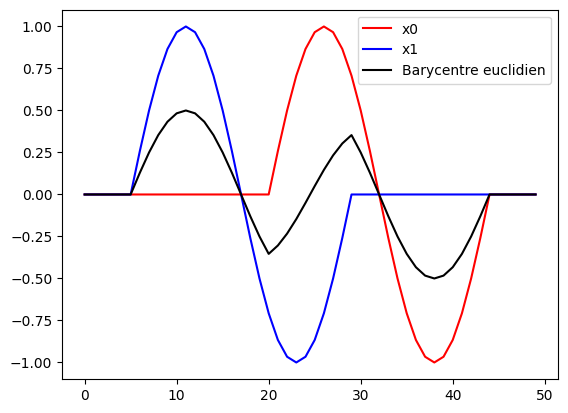

In [6]:
plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1, 'b-', label='x1')  # blue
plt.plot(euclidean_barycenter, 'k-', label='Barycentre euclidien')
plt.legend()
plt.show()

**Question.** Répétez cette expérience avec un barycentre DTW (en se reposant sur [l'implémentation fournie par `tslearn`](https://tslearn.readthedocs.io/en/stable/gen_modules/barycenters/tslearn.barycenters.dtw_barycenter_averaging.html#tslearn.barycenters.dtw_barycenter_averaging)).

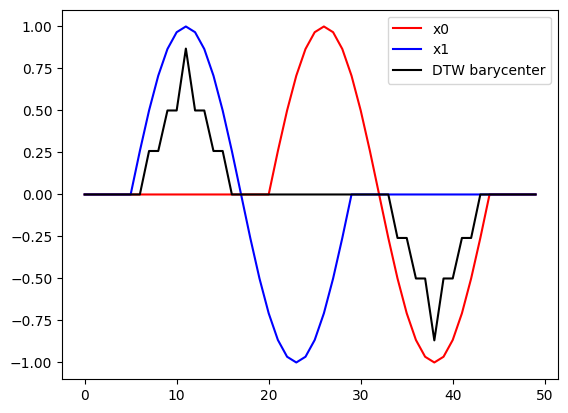

In [7]:
dtw_barycenter = dtw_barycenter_averaging([x0, x1])

plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1, 'b-', label='x1')  # blue
plt.plot(dtw_barycenter[:, 0], 'k-', label='DTW barycenter')
plt.legend()
plt.show()

**Question.** Il est possible que le barycentre obtenu soit bruité. Utilisez un barycentre soft-DTW pour améliorer ce point ([lien vers les docs du calcul de barycentre softDTWdans `tslearn`](https://tslearn.readthedocs.io/en/stable/gen_modules/barycenters/tslearn.barycenters.softdtw_barycenter.html#tslearn.barycenters.softdtw_barycenter)).
Testez avec des valeurs de $\gamma$ variant entre $10^{-3}$ et $100$ pour étudier l'influence de ce paramètre sur les barycentres obtenus.

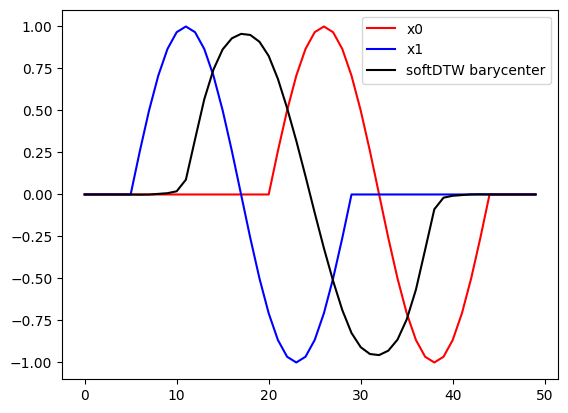

In [8]:
sdtw_barycenter = softdtw_barycenter([x0, x1], gamma=.1)

plt.figure()
plt.plot(x0, 'r-', label='x0')  # red
plt.plot(x1, 'b-', label='x1')  # blue
plt.plot(sdtw_barycenter[:, 0], 'k-', label='softDTW barycenter')
plt.legend()
plt.show()

## Clustering d'un jeu de séries temporelles

**Question.** Exécutez le code ci-dessous pour charger un sous-ensemble du jeu de données de séries temporelles "Trace".

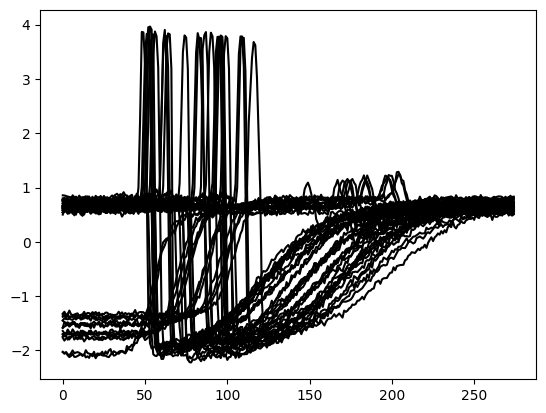

In [9]:
from tslearn.datasets import CachedDatasets

np.random.seed(0)
data_loader = CachedDatasets()
X_train, y_train, X_test, y_test = data_loader.load_dataset("Trace")

X = X_train[y_train < 4]
np.random.shuffle(X)
X = X[:50]

for ts in X:
    plt.plot(ts[:, 0], color='k')

On va chercher à extraire des _clusters_, c'est-à-dire des groupes homogènes de séries temporelles, à partir du jeu de données ci-dessus.
Pour cela, on utilisera la classe [`TimeSeriesKMeans`](https://tslearn.readthedocs.io/en/stable/gen_modules/clustering/tslearn.clustering.TimeSeriesKMeans.html) de la librairie `tslearn`.

**Question.** Par défaut, quelle mesure de similarité est utilisée par `TimeSeriesKMeans` pour le clustering ?

_VOTRE RÉPONSE ICI_

La distance euclidienne (le paramètre `metric` a pour valeur par défaut `"euclidean"`).

De manière générale, on interagit avec les modèles (appelés _estimateurs_) proposés par `tslearn` comme on le ferait avec des estimateurs `scikit-learn`.
Dans le cas d'un problème de clustering, comme ici, la syntaxe sera de la forme :

```python
m = LaClasseDeMonModele(hyper_parametre=valeur)
m.fit(X)  # X est le jeu de données dans lequel on cherche les clusters

# Ensuite, les assignations des données dans des clusters sont obtenues par :
print(m.labels_)
```

**Question.** Effectuez un _clustering_ euclidien en 3 groupes du jeu de données chargé ci-dessus et observez les groupes obtenus à l'aide du code fourni.

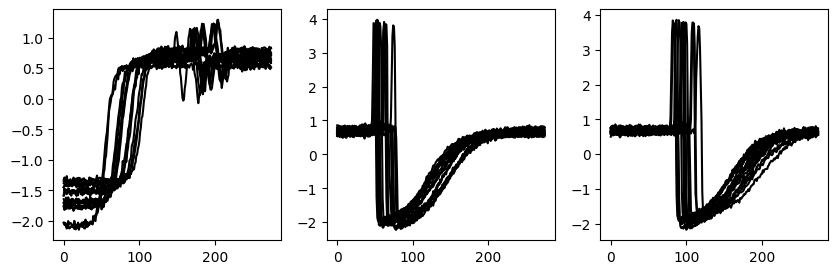

In [10]:
# TODO : votre code ici
km = TimeSeriesKMeans(n_clusters=3)
km.fit(X)

plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    for ts in X[km.labels_ == i]:
        plt.plot(ts[:, 0], 'k')

**Question.** Faites de même pour un _clustering_ reposant sur la DTW comme mesure de similarité.

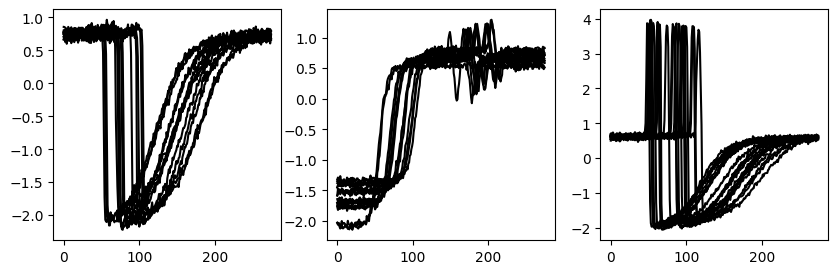

In [11]:
# TODO : votre code ici
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(X)

plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    for ts in X[km.labels_ == i]:
        plt.plot(ts[:, 0], 'k')

Les barycentres obtenus pour chaque groupe sont accessibles via l'attribut `km.cluster_centers_` pour un modèle appelé `km`.
Ajoutez ces barycentres tracés en rouge sur les figures ci-dessus pour voir s'ils sont bien en phase avec le contenu des clusters.

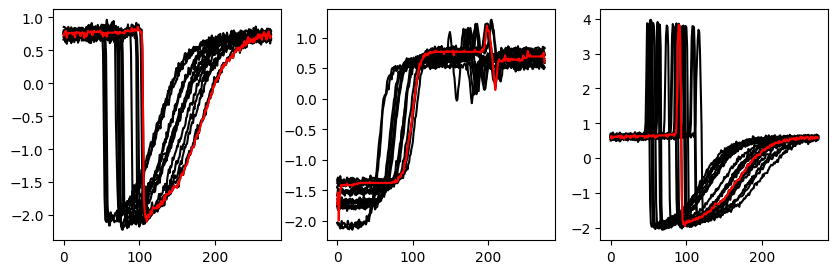

In [12]:
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    for ts in X[km.labels_ == i]:
        plt.plot(ts[:, 0], 'k')
    plt.plot(km.cluster_centers_[i, :, 0], 'r')

# Prédiction à plusieurs pas de temps

Dans la suite, vous allez implémenter un réseau de neurones totalement connecté (de type _Multi Layer Perceptron_, MLP) pour une tâche de prédiction du futur d'une série temporelle sur un horizon temporel de plusieurs pas de temps.
Dans ce cadre, vous comparerez l'utilisation d'une fonction de coût (_loss_) erreur quadratique avec la variante soft-DTW.

Pour cela, vous vous reposerez sur [la _loss_ PyTorch fournie dans le module `metrics` de `tslearn`](https://tslearn.readthedocs.io/en/stable/gen_modules/metrics/tslearn.metrics.SoftDTWLossPyTorch.html).

On fournit le code ci-dessous qui est une implémentation d'un _Multi-Layer-Perceptron_ en `torch`, sur laquelle vous vous appuierez pour cette tâche de prédiction.

In [13]:
import torch
from torch import nn

class MultiLayerPerceptron(torch.nn.Module):  # No hidden layer here
    def __init__(self, layers, loss=None):
        # At init, we define our layers
        super(MultiLayerPerceptron, self).__init__()
        self.layers = layers
        if loss is None:
            self.loss = torch.nn.MSELoss(reduction="none")
        else:
            self.loss = loss
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.001)


    def forward(self, X):
        # The forward method informs about the forward pass: how one computes outputs of the network
        # from the input and the parameters of the layers registered at init
        if not isinstance(X, torch.Tensor):
            X = torch.Tensor(X)
        batch_size = X.size(0)
        X_reshaped = torch.reshape(X, (batch_size, -1))  # Manipulations to deal with time series format
        output = self.layers(X_reshaped)
        return torch.reshape(output, (batch_size, -1, 1))  # Manipulations to deal with time series format

    def fit(self, X, y, max_epochs=10):
        # The fit method performs the actual optimization
        X_torch = torch.Tensor(X)
        y_torch = torch.Tensor(y)

        for e in range(max_epochs):
            self.optimizer.zero_grad()
            # Forward pass
            y_pred = self.forward(X_torch)
            # Compute Loss
            loss = self.loss(y_pred, y_torch).mean()
            if e % 50 == 0:
                print('Epoch {}: train loss: {}'.format(e, loss.item()))
            # Backward pass
            loss.backward()
            self.optimizer.step()

**Question.** D'après l'extrait de code ci-dessous, quelle est la taille de la série fournie en entrée du réseau et pour combien de pas de temps doit-on effectuer la prédiction ?

_VOTRE REPONSE ICI_

Les séries fournies en entrée ont une longueur de 150 pas de temps et l'on doit faire la prédiction pour les 125 pas de temps suivants.

In [14]:
# Example definition of a MLP model using the class above
model = MultiLayerPerceptron(
    layers=nn.Sequential(
        nn.Linear(in_features=150, out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=125)
    )
)
model.fit(X[:, :150], X[:, 150:], max_epochs=1001)

Epoch 0: train loss: 0.4402547776699066
Epoch 50: train loss: 0.41888663172721863
Epoch 100: train loss: 0.3990773558616638
Epoch 150: train loss: 0.3806145191192627
Epoch 200: train loss: 0.36335042119026184
Epoch 250: train loss: 0.347137451171875
Epoch 300: train loss: 0.33187833428382874
Epoch 350: train loss: 0.3174634277820587
Epoch 400: train loss: 0.30381640791893005
Epoch 450: train loss: 0.2908766269683838
Epoch 500: train loss: 0.27858659625053406
Epoch 550: train loss: 0.26688703894615173
Epoch 600: train loss: 0.2557378113269806
Epoch 650: train loss: 0.24509800970554352
Epoch 700: train loss: 0.2349405437707901
Epoch 750: train loss: 0.22523242235183716
Epoch 800: train loss: 0.21594871580600739
Epoch 850: train loss: 0.2070724219083786
Epoch 900: train loss: 0.1985797882080078
Epoch 950: train loss: 0.19045570492744446
Epoch 1000: train loss: 0.18268293142318726


**Question.** Exécutez le code ci-dessus qui correspond à l'apprentissage d'un modèle en optimisant une fonction de coût de type "erreur quadratique". À l'aide du code ci-dessous, visualisez la prédiction pour une série du jeu de test. Qu'en pensez-vous ?

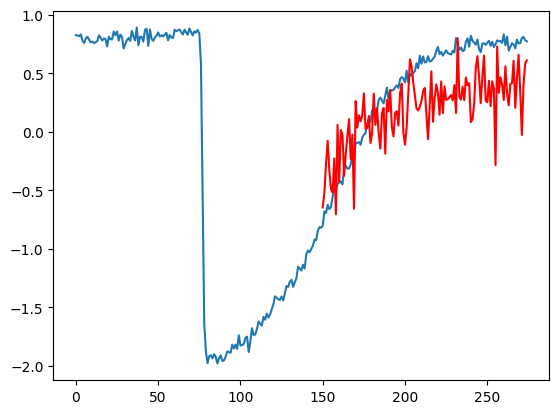

In [15]:
ts_index = 50

y_pred = model(X_test[:, :150, 0]).detach().numpy()

plt.figure()
plt.plot(X_test[ts_index].ravel())
plt.plot(np.arange(150, 275), y_pred[ts_index], 'r-')
plt.show()

**Question.** Modifiez le code ci-dessus pour entraîner un modèle en minimisant cette fois une fonction de coût SoftDTW (avec un paramètre $\gamma$ fixé arbitrairement à la valeur $0.1$).

In [16]:
from tslearn.metrics import SoftDTWLossPyTorch as SoftDTWLoss

# TODO : définition du modèle et entraînement
model = MultiLayerPerceptron(
    layers=nn.Sequential(
        nn.Linear(in_features=150, out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256, out_features=125)
    ),
    loss=SoftDTWLoss(gamma=.1)
)
model.fit(X[:, :150], X[:, 150:], max_epochs=101)

Epoch 0: train loss: 24.540857315063477
Epoch 50: train loss: -14.793103218078613
Epoch 100: train loss: -17.815378189086914


**Question.** Visualisez la prédiction générée pour le même exemple du jeu de test (`ts_index = 50`) que précédemment.

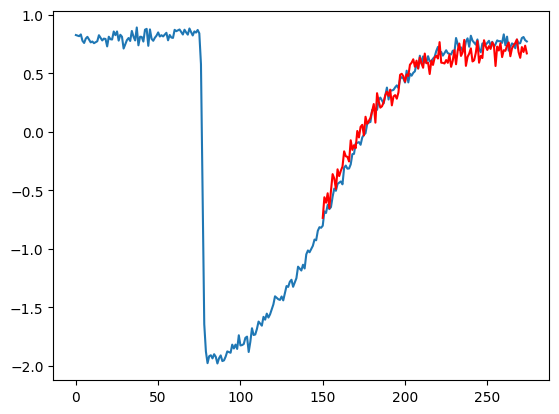

In [17]:
ts_index = 50

y_pred = model(X_test[:, :150, 0]).detach().numpy()

plt.figure()
plt.plot(X_test[ts_index].ravel())
plt.plot(np.arange(150, 275), y_pred[ts_index], 'r-')
plt.show()